# CNN分类器代码实现-验证 

## 文件简介 

####  项目1-CNN分类器代码实现_验证.ipynb

包括背景介绍、分类器发展、代码结构、模型结构、训练过程可视化、实际例子测试、整体测试效果等。

#### project1_pytorch_train.py

训练文件，可用于GPU运算加速，同时保存所需要权重文件:result/weight和训练过程可视化效果:result/process_picture。

####  project1_pytorch_train.ipynb

torch框架下实现的对各种CNN分类器代码训练过程的详细过程注释

#### project1_mindspore_train.ipynb

mindspore框架下实现的对各种CNN分类器代码训练过程的详细过程注释
生成的py文件用于在GPU硬件上进行加速训练

## 背景介绍 

   Paul J. Werbos 因在 1974 年的哈佛大学博士论文中首次提出通过反向传播算法来训练人工神经网络而闻名，被称为“反向传播之父”，打破了运算结果只能向前传递的限制，从而使得机器能够通过运算结果调节模型成为可能。因此，机器获得了“学习”的能力！
   在此基础上，机器学习理论飞速发展，分类器旨在通过学习训练集合上不同类别的特征从而实现在新测试目标上的分类功能！

## 项目介绍

本项目探讨CNN网络用于图像分类历史上的几个典型模型，我首先从全连接神经网络入门，之后是5个CNN网络分类FashionMNIST数据集。

## CNN图像分类模型发展历史

| 模型       | 发布年份 | 详细介绍                                                                                                      |
|------------|----------|----------------------------------------------------------------------------------------------------------------|
| LeNet      | 1989     | LeNet是由Yann LeCun等人提出的，用于手写数字识别。它是最早的卷积神经网络之一，由多个卷积层和池化层组成，最后连接全连接层进行分类。 |
| AlexNet    | 2012     | AlexNet由Alex Krizhevsky等人提出，在ImageNet竞赛中取得了显著成绩。它使用了更深的网络结构和ReLU激活函数，首次在大规模数据集上展现了深度学习的威力。 |
| VGG        | 2014     | VGG由牛津大学的研究团队提出，主要特点是使用了较小的3x3卷积核，但加深了网络层数。它有VGG16和VGG19两种变体，以网络层数命名。 |
| ResNet     | 2015     | ResNet由微软研究院提出，通过引入残差连接解决了深层神经网络的退化问题。ResNet50、ResNet101和ResNet152是其常见变体，数字代表网络层数。 |
| DenseNet   | 2017     | DenseNet通过连接每一层到后续的所有层，极大地提高了特征复用效率和梯度传递效果，减少了参数数量，同时提升了模型性能。  

本项目将使用以上CNN网络结构实现对FashionMNIST数据集的分类  
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 代码结构 

### 导入需要的库 

In [40]:
import keras
import numpy as np
import tensorflow as tf
import torch
from torch import nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torchvision
import sklearn
import tempfile
import sys
from sklearn.metrics import classification_report, confusion_matrix
import random

print("环境准备完毕")

环境准备完毕


### 加载数据集
由于文件权限问题，此处使用临时目录文件
同时，预训练权重文件目录在此处进行定义，可以统筹更换所有模型的权重，方便后续对模型进行优化和权重的更换！只需要更换目录，就可以更换所有需要的预训练权重！

In [3]:
def load_data_fashion_mnist(mnist_train, mnist_test, batch_size):
    if sys.platform.startswith('win'):
        num_workers = 0
    else:
        num_workers = 4
    train_iter = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    test_iter = DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    return train_iter, test_iter

# 使用临时目录
with tempfile.TemporaryDirectory() as tmpdirname:
    train_loader = DataLoader(
        datasets.FashionMNIST(
            root=tmpdirname, 
            train=True, 
            transform=transforms.ToTensor(), 
            download=True
        ), 
        batch_size=64, 
        shuffle=True
    )
    test_loader = DataLoader(
        datasets.FashionMNIST(
            root=tmpdirname, 
            train=False, 
            transform=transforms.ToTensor(), 
            download=True
        ), 
        batch_size=64, 
        shuffle=False
    )

    mnist_train = torchvision.datasets.FashionMNIST(
        root=tmpdirname, 
        train=True, 
        download=True, 
        transform=transforms.ToTensor()
    )
    mnist_test = torchvision.datasets.FashionMNIST(
        root=tmpdirname, 
        train=False, 
        download=True, 
        transform=transforms.ToTensor()
    )

    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

weight_dir = '../results/weight/'

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting /tmp/tmpwogkdbex/FashionMNIST/raw/train-images-idx3-ubyte.gz to /tmp/tmpwogkdbex/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting /tmp/tmpwogkdbex/FashionMNIST/raw/train-labels-idx1-ubyte.gz to /tmp/tmpwogkdbex/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting /tmp/tmpwogkdbex/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to /tmp/tmpwogkdbex/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting /tmp/tmpwogkdbex/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to /tmp/tmpwogkdbex/FashionMNIST/raw



### 实际例子测试函数 

In [49]:
def test_example(net,test_loader):
    net.eval()
    test_images, test_labels = next(iter(test_loader))
    test_images, test_labels = test_images.to(device), test_labels.to(device)  # 将数据移动到 GPU 上
    with torch.no_grad():
        output = net(test_images[:5])

    # 将输出转换为类别索引
    predicted_labels = torch.argmax(output, dim=1)
    actual_labels = test_labels[:5]

    # 打印转换后的预测结果和实际标签
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    print("Predicted labels:\n", [class_names[label] for label in predicted_labels.cpu().numpy()])
    print("Actual labels:\n", [class_names[label] for label in actual_labels.cpu().numpy()])

    # 可视化随机一个图像和预测结果
    index = random.randint(0, 4)
    image = test_images[index].cpu().numpy().transpose((1, 2, 0))
    plt.imshow(image.squeeze(), cmap='gray')  # 将图像数据移动回 CPU
    plt.title(f'Predicted: {class_names[predicted_labels[index].item()]}, Actual: {class_names[actual_labels[index].item()]}')
    plt.show()

### 整体数据测试函数 

In [5]:
def test_all(net,test_loader):
    net.to(device)
    net.eval()  # 设置为评估模式
    # 进行预测并收集测试结果
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            outputs = net(X)
            preds = outputs.argmax(dim=1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y.cpu().numpy())

    # 计算评估指标
    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=mnist_test.classes))

### 引子——全连接层解决分类问题
在正式使用CNN卷积神经网络进行图像分类之前，我首先使用更为基础的、普遍的、便于理解的全连接网络解决图像分类问题。FashionNet单个图片28*28的size，我首先将其flatten操作，之后添加一层hidden layer，设置epoch=100，lr=0.001，并且在智海平台进行训练

#### 定义网络结构 

In [6]:
class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.shape[0], -1)  # Flatten the input
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

#### 网络实例化 

In [7]:
fc_net = Network()
fc_net = torch.load('../results/weight/FC_mnist.pth')

#### 训练过程可视化 


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/FC.png" width="500px"/></div>
</div>


#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


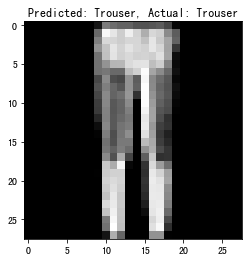

In [50]:
test_example(fc_net,test_loader)

#### 全部例子测试 

In [9]:
test_all(fc_net,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.76      0.90      0.83      1000
     Trouser       0.98      0.97      0.98      1000
    Pullover       0.82      0.77      0.80      1000
       Dress       0.92      0.84      0.88      1000
        Coat       0.75      0.88      0.81      1000
      Sandal       0.97      0.96      0.96      1000
       Shirt       0.77      0.61      0.68      1000
     Sneaker       0.94      0.96      0.95      1000
         Bag       0.97      0.96      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## 模型简介

### LeNet (1989)
LeNet是由Yann LeCun等人提出的，用于手写数字识别。它是最早的卷积神经网络之一，对后续的深度学习研究产生了深远影响。  
相较于全连接神经网络，卷积神经网络的特性能够更好的处理图像信息，实现对图像特征的提取。

#### 定义网络结构 

In [10]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 6, 5), # in_channels, out_channels, kernel_size
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2), # kernel_size, stride
            nn.Conv2d(6, 16, 5),
            nn.Sigmoid(),
            nn.MaxPool2d(2, 2)
        )
        self.fc = nn.Sequential(
            nn.Linear(16*4*4, 120),
            nn.Sigmoid(),
            nn.Linear(120, 84),
            nn.Sigmoid(),
            nn.Linear(84, 10)
        )

    def forward(self, img):
        feature = self.conv(img)
        output = self.fc(feature.view(img.shape[0], -1))
        return output

#### 网络实例化 

In [14]:
Lenet = LeNet()
Lenet = torch.load('../results/weight/LeNET_mnist.pth',map_location=torch.device('cpu'))

#### 训练过程可视化 


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/LeNet.png" width="800px"/></div>
</div>



#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


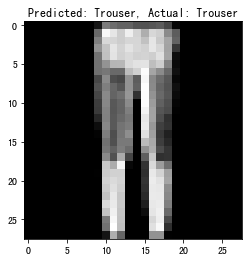

In [51]:
test_example(Lenet,test_loader)

#### 整体例子测试 

In [16]:
test_all(Lenet,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.85      0.85      0.85      1000
     Trouser       0.99      0.97      0.98      1000
    Pullover       0.80      0.85      0.82      1000
       Dress       0.89      0.92      0.91      1000
        Coat       0.84      0.78      0.81      1000
      Sandal       0.98      0.97      0.97      1000
       Shirt       0.73      0.71      0.72      1000
     Sneaker       0.94      0.97      0.95      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.97      0.95      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



### AlexNet (2012)
AlexNet由Alex Krizhevsky等人提出，在ImageNet竞赛中取得了显著成绩，标志着深度学习在计算机视觉领域的突破。  
Relu激活函数的引入使得卷积网络在不同层直接的映射和特征提取具有更强大的优势，相较于LeNet，AlexNet通过激活函数获取更好的图像特征提取和分类效果！

#### 定义网络结构 

In [17]:
class AlexNet(nn.Module):
    def __init__(self):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),  # 1 通道改为 64
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 3 * 3, 1024),
            nn.ReLU(),
            nn.Dropout(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        output = self.classifier(x)
        return output

#### 网络实例化

In [24]:
Alexnet = AlexNet()
Alexnet = torch.load('../results/weight/Alexnet_mnist.pth',map_location=torch.device('cpu'))

#### 训练过程可视化 


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/AlexNet.png" width="800px"/></div>
</div>


#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


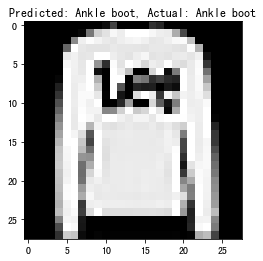

In [46]:
test_example(Alexnet,test_loader)

#### 整体例子测试 

In [26]:
test_all(Alexnet,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.91      0.84      0.87      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.88      0.89      0.88      1000
       Dress       0.94      0.92      0.93      1000
        Coat       0.87      0.86      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.73      0.81      0.77      1000
     Sneaker       0.96      0.99      0.97      1000
         Bag       0.99      0.98      0.99      1000
  Ankle boot       0.98      0.96      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



### VGG (2014)
VGG由牛津大学的研究团队提出，模型通过增加网络深度（层数）显著提高了图像分类的准确性。  
相较于AlexNet卷积网络，Vgg通过增加卷积层的数量来获取更强大的特征提取能力和图像分类能力。

#### 定义网络结构 

In [27]:
# 定义简化的 VGG 网络
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(256, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(512, 512, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(512 * 1 * 1, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 10),
        )

    def forward(self, x):
        x = self.features(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        return x

#### 网络实例化 

In [28]:
vggnet = VGGNet()
vggnet = torch.load('../results/weight/vggnet_mnist.pth',map_location=torch.device('cpu'))

#### 训练过程可视化
随着卷积层数量增加，**出现退化现象，loss和acc出现明显的波动**，在改进后的ResNet网络中加入的**残差网络**可以有效减轻这种现象。


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/VggNet.png" width="800px"/></div>
</div>


#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


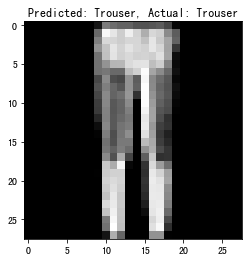

In [52]:
test_example(vggnet,test_loader)

#### 整体例子测试 

In [30]:
test_all(vggnet,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.83      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.86      0.85      1000
       Dress       0.91      0.92      0.91      1000
        Coat       0.86      0.87      0.86      1000
      Sandal       0.98      0.96      0.97      1000
       Shirt       0.72      0.74      0.73      1000
     Sneaker       0.92      0.98      0.95      1000
         Bag       0.97      0.98      0.98      1000
  Ankle boot       0.99      0.95      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



### ResNet (2015)
ResNet由微软研究院提出，通过引入残差连接解决了深层神经网络的退化问题，极大地推动了深度学习的发展。  
为了解决卷积层增加过程中梯度消失、爆炸的情况，即两层神经网络之间出现了直接线性映射导致神经网络退化，何教授在CVPR发布了残差网路结构，通过一部分低秩矩阵降低信息量，实现网络的优化。

#### 定义网络结构 

In [31]:
# 定义基本的残差块
class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion * planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion * planes, kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion * planes)
            )

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = torch.relu(out)
        return out

class ResNet(nn.Module):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(1, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512 * block.expansion * 4 * 4, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = torch.relu(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = torch.flatten(out, 1)
        out = self.linear(out)
        return out
    
def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])

#### 网络实例化 

In [33]:
resnet = ResNet18()
resnet = torch.load('../results/weight/resnet_mnist.pth',map_location=torch.device('cpu'))

#### 训练过程可视化 


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/ResNet.png" width="800px"/></div>
</div>


#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'T-shirt/top']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


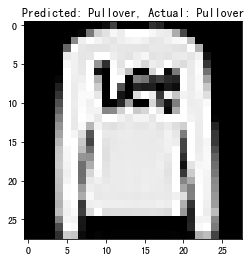

In [53]:
test_example(resnet,test_loader)

#### 整体例子测试 

In [35]:
test_all(resnet,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.86      0.89      0.88      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.90      0.92      0.91      1000
       Dress       0.93      0.92      0.92      1000
        Coat       0.90      0.91      0.90      1000
      Sandal       0.99      0.98      0.98      1000
       Shirt       0.82      0.77      0.79      1000
     Sneaker       0.97      0.97      0.97      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.96      0.98      0.97      1000

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



### DenseNet (2017)
DenseNet通过连接每一层到后续的所有层，进一步缓解了梯度消失问题，提高了特征复用效率。

#### 定义网络结构

In [36]:
class Bottleneck(nn.Module):
    def __init__(self, in_planes, growth_rate):
        super(Bottleneck, self).__init__()
        self.bn1 = nn.BatchNorm2d(in_planes)
        self.conv1 = nn.Conv2d(in_planes, 4 * growth_rate, kernel_size=1, bias=False)
        self.bn2 = nn.BatchNorm2d(4 * growth_rate)
        self.conv2 = nn.Conv2d(4 * growth_rate, growth_rate, kernel_size=3, padding=1, bias=False)

    def forward(self, x):
        out = self.conv1(torch.relu(self.bn1(x)))
        out = self.conv2(torch.relu(self.bn2(out)))
        out = torch.cat([out, x], 1)
        return out

class Transition(nn.Module):
    def __init__(self, in_planes, out_planes):
        super(Transition, self).__init__()
        self.bn = nn.BatchNorm2d(in_planes)
        self.conv = nn.Conv2d(in_planes, out_planes, kernel_size=1, bias=False)

    def forward(self, x):
        out = self.conv(torch.relu(self.bn(x)))
        out = nn.functional.avg_pool2d(out, 2)
        return out

class DenseNet(nn.Module):
    def __init__(self, block, nblocks, growth_rate=12, reduction=0.5, num_classes=10):
        super(DenseNet, self).__init__()
        self.growth_rate = growth_rate

        num_planes = 2 * growth_rate
        self.conv1 = nn.Conv2d(1, num_planes, kernel_size=3, padding=1, bias=False)

        self.dense1 = self._make_dense_layers(block, num_planes, nblocks[0])
        num_planes += nblocks[0] * growth_rate
        self.trans1 = Transition(num_planes, num_planes // 2)
        num_planes = num_planes // 2

        self.dense2 = self._make_dense_layers(block, num_planes, nblocks[1])
        num_planes += nblocks[1] * growth_rate
        self.trans2 = Transition(num_planes, num_planes // 2)
        num_planes = num_planes // 2

        self.dense3 = self._make_dense_layers(block, num_planes, nblocks[2])
        num_planes += nblocks[2] * growth_rate

        self.bn = nn.BatchNorm2d(num_planes)
        self.linear = nn.Linear(1536, num_classes)
  # 修改全连接层输入维度

    def _make_dense_layers(self, block, in_planes, nblock):
        layers = []
        for _ in range(nblock):
            layers.append(block(in_planes, self.growth_rate))
            in_planes += self.growth_rate
        return nn.Sequential(*layers)

    def forward(self, x):
        # print("Input shape:", x.shape)
        out = self.conv1(x)
        # print("After Conv1:", out.shape)
        out = self.trans1(self.dense1(out))
        # print("After Dense1 and Trans1:", out.shape)
        out = self.trans2(self.dense2(out))
        # print("After Dense2 and Trans2:", out.shape)
        out = self.dense3(out)
        # print("After Dense3:", out.shape)
        out = torch.relu(self.bn(out))
        out = nn.functional.avg_pool2d(out, 3)
        # print("After final avg pool:", out.shape)
        out = out.view(out.size(0), -1)
        # print("Before Linear:", out.shape)
        out = self.linear(out)
        return out

def DenseNet121():
    return DenseNet(Bottleneck, [6, 12, 24], growth_rate=12)

densenet = DenseNet121().to(device)

#### 网络实例化 

In [37]:
densenet = DenseNet121()
densenet = torch.load("../results/weight/densenet_mnist.pth",map_location=torch.device('cpu'))

#### 训练过程可视化 


<div class='insertContainerBox column'>
<div class='insertItem' align=center><img src="https://mo.zju.edu.cn/hub_api/user/O8JZo8BUrPCdqwa9iLtgtfL-iPuUiQw0QekIQRHHuwNv9F2BH_fuTU7y5ZkVjfH4UA%3D%3D/files/results/process_picture/DenseNet.png" width="800px"/></div>
</div>


#### 实际例子测试 

Predicted labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']
Actual labels:
 ['Ankle boot', 'Pullover', 'Trouser', 'Trouser', 'Shirt']


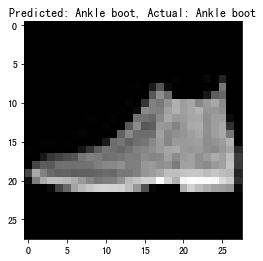

In [54]:
test_example(densenet,test_loader)

#### 整体例子测试 

In [39]:
test_all(densenet,test_loader)

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.89      0.89      0.89      1000
     Trouser       0.99      0.99      0.99      1000
    Pullover       0.94      0.89      0.91      1000
       Dress       0.94      0.91      0.93      1000
        Coat       0.91      0.90      0.91      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.77      0.84      0.80      1000
     Sneaker       0.97      0.98      0.97      1000
         Bag       0.99      0.99      0.99      1000
  Ankle boot       0.98      0.98      0.98      1000

    accuracy                           0.94     10000
   macro avg       0.94      0.93      0.94     10000
weighted avg       0.94      0.94      0.94     10000



## 总结 

由多层感知机（MLP）为基础的神经网络具有从数据中获取信息并且实现基于特征的目标分类功能。本项目以此为基础，使用了全连接神经网络、LeNet卷积网络、AlexNet卷积网络、Vgg卷积网络、ResNet卷积网络、DenseNet卷积网络实现了对FashionMNIST数据集的分类，并且实现性能、准确率分析。

### 模型对比 

#### 传统全连接与CNN网络结构对比 



*   传统全连接神经网络：运算速度较快，在图像数据量增大、分类增多的情况下，无法实现对特征的精确提取
*   CNN神经网络：更适合处理图像类信息，图像像素层面的大量卷积操作导致运算速度慢、算力要求高。具有更强的图像特征提取能力。



---



#### 不同网络结构的CNN神经网络对比 



*   LeNet卷积网络：首次使用卷积操作处理图像像素层信息来提取图形特征，相较于全连接网络，在处理图像分类任务中效益显著提升，但是运算时长更长。
*   AlexNet卷积网络：引入Relu函数，提高了卷积层之间映射效率，大幅提升了特征提取的效益。
*   Vgg卷积网络：通过堆叠更多卷积层的方式提高神经网络对特征提取和分类的能力，但是过多卷积层会带来梯度消失或者梯度爆炸的现象，从而出现退化现象，这在“训练过程可视化”部分可以发现，训练过程的loss值和acc等都出现明显的波动，在接下来的ResNet中，添加残差网络层后可以有效改善这种情况。
*   ResNet卷积网络：引入残差网络层，有效缓解在网络层数增加过程中出现的梯度消失或者梯度爆炸以及退化现象。
*   DenseNet卷积网络：通过连接每一层到后续的所有层，进一步缓解了梯度消失问题，进一步增加的网络结构的复杂性，提高了特征复用效率。
---
#### CNN卷积神经网络随着时间的推移，主要呈现以下发展特征：


*   网络结构逐渐加深，从LeNet较为浅层的网络到DenseNet，卷积网络结构逐渐加深，从而获取更好的特征提取能力。
*   网络结构日益复杂，从最开始的卷积层、池化层，再到新引入relu等激活函数，多种池化方式的选择以及残差网络层的引入，对特征提取、消除退化、预防梯度消失和梯度爆炸问题具有显著效益。

由此，在针对FashionMNIST数据集的操作上，由古至今，由于以上两点特征，训练和测试时间逐渐增长，对算力的要求更高，这也符合近年来微电子产业的发展趋势！  
同时，在预测的准确性上也略有提高，这主要原因是FashionMNIST数据集体量较小，无法体现出较复杂网络的优势，这也受限制于算力，无法对更加大型的数据集进行测试！




### 未来展望 

#### 当前的不足
虽然CNN网络在图像像素层上的运算来提取目标特征从而进行目标分类方面具有明显的优势，但是缺点也比较明显:


1.   像素层面进行运算，需要有较大算力的支持
2.   没有办法实现较大规模的泛化
3.   ...

#### 未来的大模型与多模态
在CNN之后，有更具优势的大模型能够更好的完成相关任务，DenseNet之后，图像分类任务主要由大模型来完成，并且DenseNet中链接每一层到后一层，已经具有了transformer模型的位置编码的雏形！  
例如：**扩散模型(Difussion Model)**，其具有以下有点：


1.   运算速度：通过编码器(encoder)和解码器(decoder)实现图像像素层面和信息层面的转化，推理部分在**信息层面**进行，从而对算力的要求较低，推理速度较快！
2.   泛化能力：在信息层面进行推理，同样可以实现语音、文字等信息层面的推理，从而更好的处理**多模态任务**，具有更强的泛化能力！
3.   ...



### 心得体会

通过本次项目的实践，

1.   我更加深刻的体会到了CNN卷积神经网络在图像分类任务中的发展历程
2.   更加熟练地掌握了torch框架和mindspore框架的使用，已经卷积神经网络的搭建

最后承诺，本项目由本人独立完成！  
  **在项目任务完成之后，将会对本项目进行开源，发布在个人GitHub主页：
[Zh-Qr](https://github.com/Zh-Qr)  **  
用于教学，并为学弟学妹们入门机器视觉、图像处理方向引路！
